# Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks (2019)

출처: [https://arxiv.org/abs/1908.10084](https://arxiv.org/abs/1908.10084)

# Abstract
BERT와 RoBERTa는 semantic textual similarity (STS)와 같은 sentence-pair regression task에서 새로운 SOTA performance를 달성했습니다. 그러나, 두 문장 모두 네트워크에 입력되어야 하므로 엄청난 computational overhead가 발생합니다. 10,000개의 문장 모음에서 가장 유사한 쌍을 찾는 데 BERT로 약 5천만 번의 추론 계산(~65시간)이 필요합니다. BERT의 구성은 semantic simliarity search와 클러스터링과 같은 unsupervised tasks에 적합하지 않습니다.

이 논문에서는 코사인 유사성을 사용하여 비교할 수 있는 의미론적으로 의미 있는 문장 임베딩을 도출하기 위해 siamese 및 triplet 네트워크 구조를 사용하는 pre-trained BERT 네트워크의 수정판인 Sentence-BERT(SBERT)를 제시합니다. 이렇게 하면 BERT/RoBERTa에서 가장 유사한 쌍을 찾는 데 걸리는 시간이 65시간에서 SBERT에서는 약 5초로 단축되는 동시에 BERT의 정확도를 유지합니다.

여기서는는 일반적인 STS tasks과 transfer learning tasks에 대해 SBERT 및 SRoBERTa를 평가하며, 이는 다른 SOTA 문장 임베딩 방법보다 성능이 우수합니다.

# 1 Introduction
SBERT를 통해 BERT는 지금까지 BERT에 적용할 수 없었던 특정 새 tasks에 사용할 수 있습니다. 이러한 tasks에는 large-scale semantic similarity comparison, 클러스터링 및 semantic search를 통한 정보 검색이 포함됩니다.

클러스터링 및 semantic search를 처리하는 일반적인 방법은 의미적으로 유사한 문장이 가깝도록 각 문장을 벡터 공간에 매핑하는 것입니다. researcher들은 개별 문장을 BERT에 입력하고 fixed-size 문장 임베딩을 도출하기 시작했습니다. 가장 일반적으로 사용되는 접근 방식은 BERT 출력 레이어(BERT 임베딩)를 평균화하거나 첫 번째 토큰([CLS] 토큰)의 output을 사용하여 평균을 내는 것입니다. 여기서 보여주겠지만, 이 일반적인 관행은 다소 나쁜 문장 임베딩을 생성하며, GloV 임베딩을 평균화하는 것보다 좋지 않습니다.

이 문제를 완화하기 위해 SBERT를 개발했습니다. siamese 네트워크 아키텍처를 통해 input 문장에 대한 fixed-sized 벡터를 유도할 수 있습니다. 코사인 유사도 또는 Manhatten/Euclidean distance와 같은 유사도 측정을 사용하여 의미적으로 유사한 문장을 찾을 수 있습니다.

# 3 Model
SBERT는 BERT/RoBERTa의 output에 pooling operation을 추가하여 fixed size의 문장 임베딩을 유도합니다. 여기서는 세 가지 pooling strategy를 실험합니다. CLS 토큰의 output 사용, 모든 output 벡터의 평균 계산($MEAN$-strategy), output 벡터의 max-over-time 계산($MAX$ 전략). 기본 구성은 $MEAN$입니다.

BERT/RoBERTa를 fine-tuning하기 위해 생성된 문장 임베딩이 의미론적으로 의미 있고, 코사인 유사도와 비교할 수 있도록 weights를 업데이트하는 siamese 및 triplet 네트워크를 생성합니다.

여기서는 다음 objective function을 실험합니다.

**Classification Objective Function.** 

- 문장 임베딩 $u$와 $v$, element-wise difference $|u−v|$를 concatenate하고, 훈련 가능한 weight $W_{t} \in \mathbb{R}^{3 n \times k}$를 곱합니다:

$$o=\operatorname{softmax}\left(W_{t}(u, v,|u-v|)\right)$$

여기서 $n$은 문장 임베딩의 차원이고 $k$는 레이블 수입니다. cross-entropy loss을 최적화합니다. 이 구조는 Figure 1에 나와 있습니다.

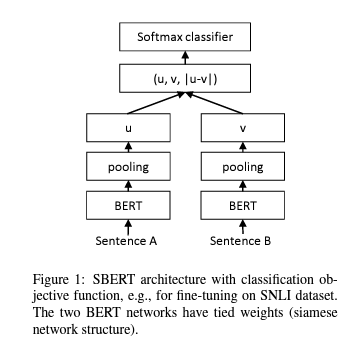

**Regression Objective Function.**

- 두 문장 임베딩 $u$와 $v$ 사이의 코사인 유사도가 계산됩니다(Figure 2). mean-squared-error를 objective function으로 사용합니다.

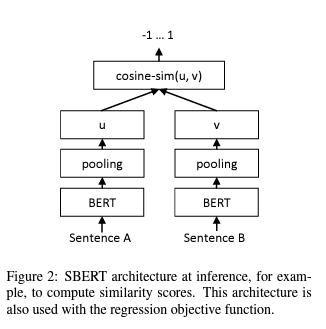

**Triplet Objective Function.**

- anchor 문장 $a$, positive 문장 $p$, negative 문장 $n$이 주어지면 triplet loss는 네트워크를 조정하여 $a$와 $p$ 사이의 거리가 $n$ 사이의 거리보다 작도록 합니다. 수학적으로 다음과 같은 loss function을 최소화합니다:

$$\max \left(\left\|s_{a}-s_{p}\right\|-\left\|s_{a}-s_{n}\right\|+\epsilon, 0\right)$$

Margin $\epsilon$은 $s_p$가 $s_n$보다 $s_a$에 더 가깝도록 합니다. metric으로 유클리드 거리를 사용하기 때문에 experiments에서는 $\epsilon\, =\, 1$로 설정했습니다.

# 4 Evaluation- Semantic Textual Similarity
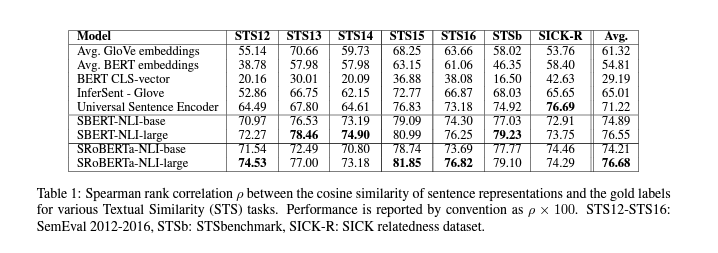

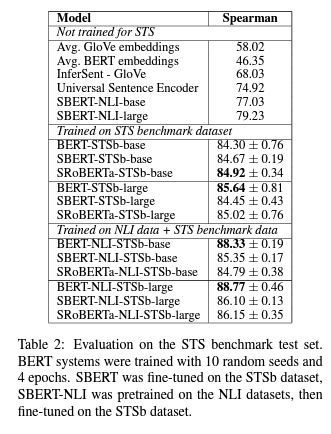

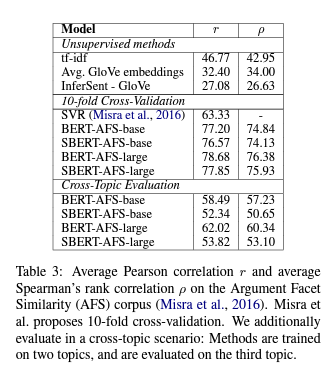

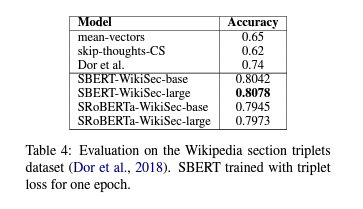

# 5 Evaluation- SentEval
- **MR**: Sentiment prediction for movie reviews snippets on a five start scale (Pang and Lee, 2005). 

- **CR**: Sentiment prediction of customer product reviews (Hu and Liu, 2004). 

- **SUBJ**: Subjectivity prediction of sentences from movie reviews and plot summaries (Pang and Lee, 2004). 

- **MPQA**: Phrase level opinion polarity classif ication from newswire (Wiebe et al., 2005). 

- **SST**: Stanford Sentiment Treebank with binary labels (Socher et al., 2013). 

- **TREC**: Fine grained question-type classification from TREC (Li and Roth, 2002). 

- **MRPC**: Microsoft Research Paraphrase Corpus from parallel news sources (Dolan et al., 2004).

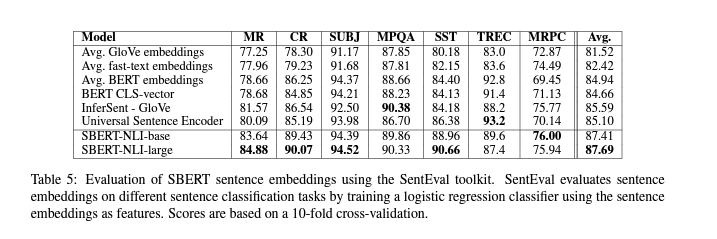

# 6 Ablation Study

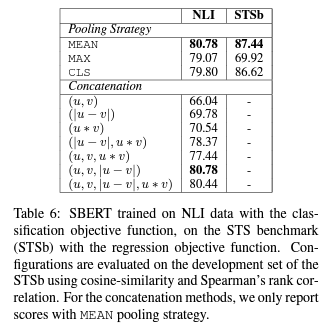

- NLI 데이터에 대한 classification objective function으로 훈련할 때 pooling strategy는 약간의 영향을 미칩니다. 반면에 concatenation mode의 영향은 훨씬 더 큽니다.

- 우리의 아키텍처에 element-wise $u\, *\, v$를 추가하면 성능이 감소합니다.

- regression objective function으로 훈련할 때, pooling strategy가 큰 영향을 미친다는 것을 관찰했습니다. 거기에서 $MAX$ strategy는 $MEAN$ 또는 $CLS$-token strategy보다 훨씬 더 나쁜 성능을 보입니다.

# 7 Computational Efficiency

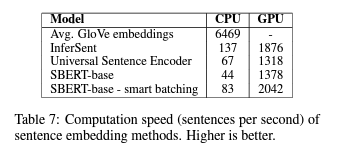

# 8 Conclusion
우리는 BERT가 코사인 유사성과 같은 일반적인 similarity measures와 함께 사용하기에는 다소 부적합한 벡터 공간에 문장을 즉시 매핑한다는 것을 보여주었습니다. 7개의 STS 작업에 대한 성능은 평균 GloVe 임베딩의 성능보다 낮았습니다.

이러한 단점을 극복하기 위해 Sentence-BERT (SBERT)를 제시했습니다. SBERT는 siamese/triplet 네트워크 아키텍처에서 BERT를 fine-tuning합니다. 우리는 다양한 공통 벤치마크에서 성능을 평가했으며, 여기에서 SOTA 문장 임베딩 방법에 비해 상당한 개선을 달성할 수 있었습니다. 그리고 BERT를 RoBERTa로 교체해도 experiment에서 크게 개선되지 않았습니다.

SBERT는 계산적으로 효율적입니다. GPU에서는 InferSent보다 약 9%, Universal Sentence Encoder보다 약 55% 빠릅니다. SBERT는 계산적으로 BERT로 모델링할 수 없는 tasks에 사용할 수 있습니다. 예를 들어, hierarchical clustering을 사용하여 10,000개의 문장을 클러스터링하려면 BERT를 사용하여 약 5천만 개의 문장 조합을 계산해야 하므로 약 65시간이 필요합니다. 하지만, SBERT를 사용하여 약 5초로 줄일 수 있었습니다.